# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Udemy Courses Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Udemy Courses Project

This notebook provides a structured approach to handling data cleaning, exploratory data analysis (EDA), and data visualization tasks using the **Udemy Courses** dataset.

Each step will cover various aspects of cleaning, analyzing, and visualizing the dataset.

## Step 1: Loading the Dataset and Initial Exploration

In [1]:
# Load the dataset 

# Display first few rows
# Check the structure of the dataset.
# Inspect the data types and missing values using df.info()
# Get basic statistics for numerical columns with df.describe()
# and more..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import missingno as msno
import plotly.express as px

In [2]:
df0 = pd.read_csv("udemy_courses_dataset.csv")

In [3]:
df=df0.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [26]:
df.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2641,812588,The Complete jQuery Course: From Beginner To A...,https://www.udemy.com/jquery-tutorial/,True,195,6636,302,50,All Levels,6.000000,2016-05-26T19:10:29Z,Web Development
355,828254,Budgeting Hacks to Build Wealth!,https://www.udemy.com/budgeting-wealth/,False,0,4931,154,7,Beginner Level,0.533333,2016-05-31T15:10:45Z,Business Finance
1791,441106,"Photoshop tips and tricks, how to change clothes",https://www.udemy.com/changing-clothes-with-ph...,True,20,837,4,26,All Levels,2.000000,2015-03-16T18:36:17Z,Graphic Design
3305,1079624,HTML and CSS for Absolute Beginners,https://www.udemy.com/html-and-css-for-absolut...,False,0,4410,52,26,All Levels,3.000000,2017-01-20T17:02:27Z,Web Development
3174,1053406,Java Web Services Part 2,https://www.udemy.com/javawebservicespart2/,True,20,959,51,74,Intermediate Level,3.000000,2017-01-12T03:10:56Z,Web Development


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


In [ ]:
## IQR for num_subscribers= 2546-111=2435
#1,5*IQR = 3652.5, we add this to 3rd quartile it makes 2546+ 3652 = 6198.5 so we may think values more than 6200 as outlier!
#IQR methodology seems to costing us to loose a lot of information so we will remove only less than 1 percent of rows.

## Step 2: Analyzing and Handling Outliers

In [ ]:
# Boxplot for outlier detection

# Example: Removing outliers
# df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.99)]

<Axes: xlabel='price'>

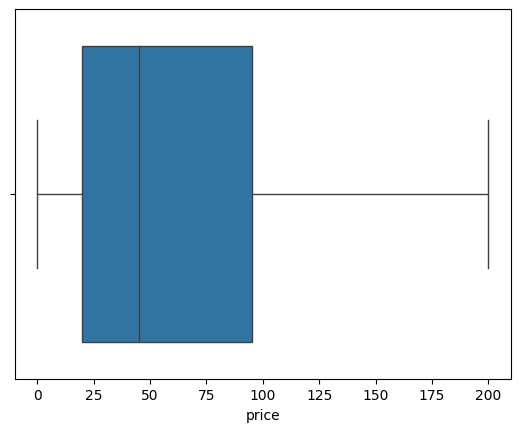

In [10]:
sns.boxplot(df, x=df.price)

##### <font color="blue">  Price column has no outlier so we leave it as it is

### Analysis of number of subscribers

<Axes: xlabel='num_subscribers'>

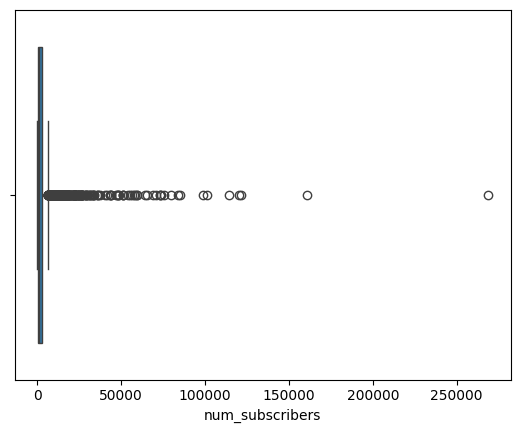

In [11]:
sns.boxplot(df, x=df.num_subscribers)

In [5]:
df = df[df['num_subscribers'] < df['num_subscribers'].quantile(0.995)]

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3659.0,678187.496310,342329.565679,8324.0,410775.0,690788.0,962545.0,1282064.0
price,3659.0,66.087729,60.855642,0.0,20.0,45.0,95.0,200.0
num_subscribers,3659.0,2705.626674,5684.292767,0.0,108.5,896.0,2489.5,59361.0
num_reviews,3659.0,117.753485,526.655639,0.0,4.0,17.0,64.0,15117.0
num_lectures,3659.0,39.757037,49.471165,0.0,15.0,25.0,45.0,779.0
content_duration,3659.0,4.055516,5.980962,0.0,1.0,2.0,4.5,78.5


<Axes: xlabel='num_subscribers'>

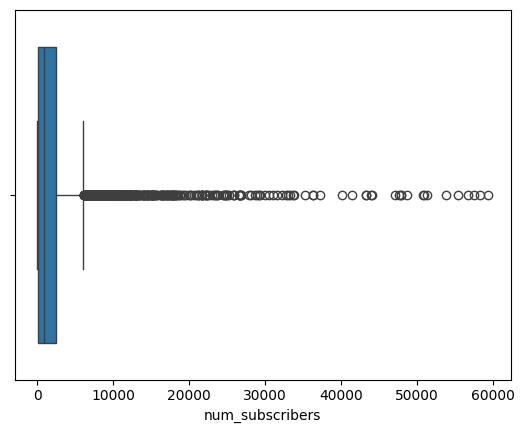

In [7]:
# boxplot after removal of outliers
sns.boxplot(df, x=df.num_subscribers)

### analysis of number of reviews

<Axes: xlabel='num_reviews'>

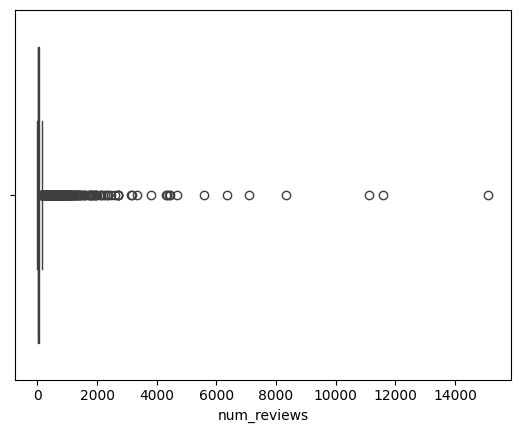

In [8]:
sns.boxplot(df, x=df.num_reviews)

In [9]:
df = df[df['num_reviews'] < df['num_reviews'].quantile(0.998)]

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3651.0,678270.636812,342553.935089,8324.0,410386.0,690546.0,963236.0,1282064.0
price,3651.0,65.883320,60.696249,0.0,20.0,45.0,95.0,200.0
num_subscribers,3651.0,2619.028211,5336.591964,0.0,107.5,886.0,2472.0,57422.0
num_reviews,3651.0,98.869077,300.560166,0.0,4.0,17.0,64.0,4434.0
num_lectures,3651.0,39.547795,49.152111,0.0,15.0,25.0,45.0,779.0
content_duration,3651.0,4.036465,5.966598,0.0,1.0,2.0,4.5,78.5


<Axes: xlabel='num_reviews'>

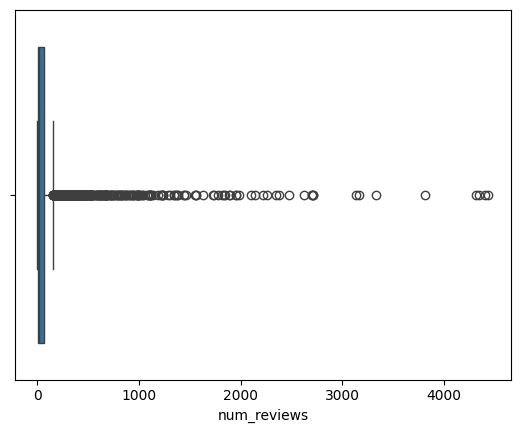

In [11]:
# boxplot after removal of outliers

sns.boxplot(df, x=df.num_reviews)

### Analysis of number of lectures

<Axes: xlabel='num_lectures'>

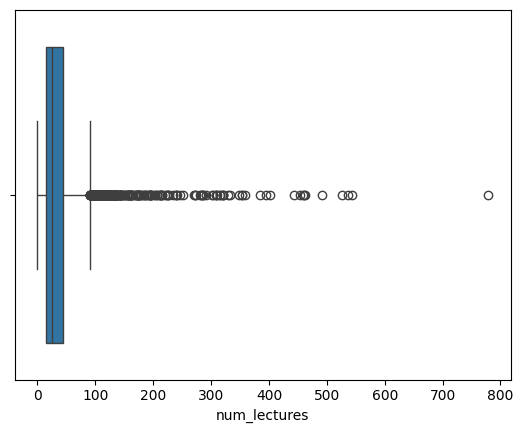

In [13]:
sns.boxplot(df, x=df.num_lectures)

In [36]:
row = df0.loc[df0['num_lectures'] == 779]
print(row)


      course_id                                       course_title  \
2707      79154  Back to School Web Development and Programming...   

                                                    url  is_paid  price  \
2707  https://www.udemy.com/back-to-school-web-devel...     True    200   

      num_subscribers  num_reviews  num_lectures           level  \
2707            18170          117           779  Beginner Level   

      content_duration   published_timestamp          subject  
2707              44.5  2013-08-19T14:53:00Z  Web Development  


In [14]:
df = df[df['num_lectures'] < df['num_lectures'].quantile(0.997)]

In [15]:

df.describe().T 


,count,mean,std,min,25%,50%,75%,max
course_id,3640.0,678644.674451,342627.910714,8324.0,410874.5,690853.0,963475.0,1282064.0
price,3640.0,65.557692,60.444374,0.0,20.0,45.0,95.0,200.0
num_subscribers,3640.0,2612.141209,5335.955791,0.0,106.0,882.5,2465.5,57422.0
num_reviews,3640.0,98.832418,300.954001,0.0,4.0,17.0,64.0,4434.0
num_lectures,3640.0,38.140659,41.689782,0.0,15.0,25.0,45.0,395.0
content_duration,3640.0,3.908553,5.441916,0.0,1.0,2.0,4.5,78.5


<Axes: xlabel='num_lectures'>

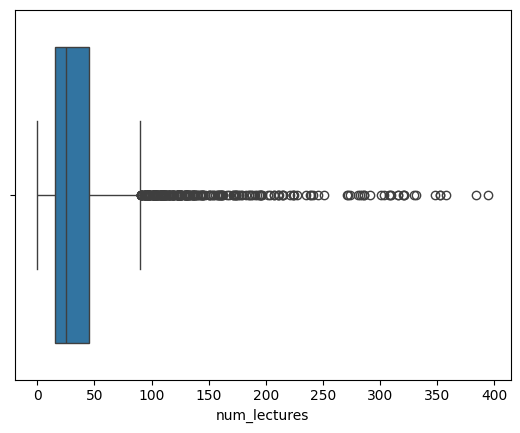

In [16]:
# boxplot after removal of outliers
sns.boxplot(df, x=df.num_lectures)

### Analysis of Content duration

In [17]:
#lets copy the dataframe in order to safeguard the actions auntil now
df1 = df.copy()

<Axes: xlabel='content_duration'>

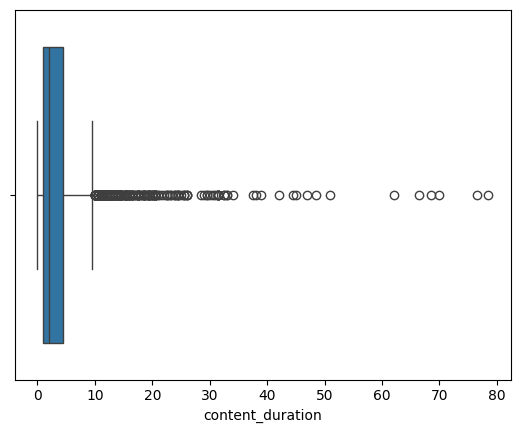

In [18]:
sns.boxplot(df, x=df1.content_duration)

In [19]:
df1 = df1[df1['content_duration'] < df1['content_duration'].quantile(0.997)]

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3629.0,679429.860292,342257.678363,8324.0,411986.0,691180.0,963664.0,1282064.0
price,3629.0,65.392670,60.327262,0.0,20.0,45.0,95.0,200.0
num_subscribers,3629.0,2591.693579,5294.993843,0.0,106.0,877.0,2437.0,57422.0
num_reviews,3629.0,97.669330,299.007408,0.0,4.0,17.0,63.0,4434.0
num_lectures,3629.0,37.600165,40.001684,0.0,15.0,25.0,45.0,395.0
content_duration,3629.0,3.739083,4.442387,0.0,1.0,2.0,4.5,42.0


<Axes: xlabel='content_duration'>

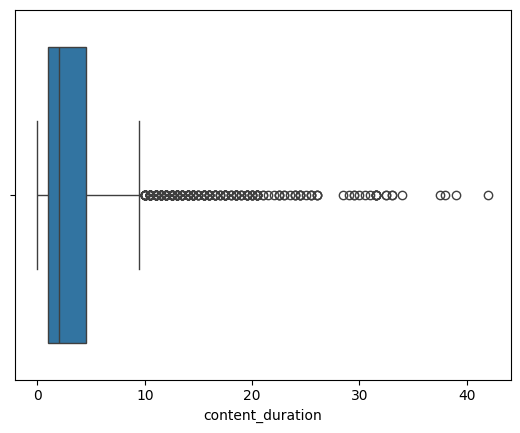

In [21]:
# boxplot after removal
sns.boxplot(df1, x=df1.content_duration)

## Step 3: Cleaning Inconsistent and Invalid Data

In [ ]:
# Standardizing the 'level' column

# Cleaning up the 'price' column, ensuring free courses have price 0

# Converting 'published_timestamp' to datetime

## Step 4: Feature Engineering

In [ ]:
# Creating 'Revenue' column

# Extracting year from 'published_timestamp'

## Step 5: Data Visualization

### Course Price Distribution

In [ ]:
# Histogram for course price distribution


### Relationship Between Price and Number of Subscribers

In [ ]:
# Scatter plot for price vs. number of subscribers


### Course Level Distribution

In [ ]:
# Bar chart for course levels


### Subject-wise Analysis

In [ ]:
# Bar chart for courses by subject


### Revenue Analysis by Year

In [ ]:
# Line chart for revenue by year


### Content Duration Analysis

In [ ]:
# Boxplot for content duration by course level


### Most Popular Courses

In [ ]:
# Bar chart for top 10 most popular courses by subscribers


### Relationship Between Number of Lectures and Reviews

In [ ]:
# Scatter plot for number of lectures vs. reviews


### Paid vs Free Courses Analysis

In [ ]:
# Pie chart for paid vs free courses


### Correlation Analysis

In [ ]:
# Correlation heatmap


## Step 6: Conclusion


- Summarize the key insights from the analysis.
- Identify trends in course pricing, popularity, and revenue.
- Suggest potential improvements for Udemy courses based on findings.


# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Tebrikler!</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |